<a href="https://colab.research.google.com/github/MohmedAAK/-Advanced-computer-vision-v1/blob/main/Advanced%20computer%20vision/team3/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils as np_utils
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd 



**Loading the MNIST dataset in Keras**

In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


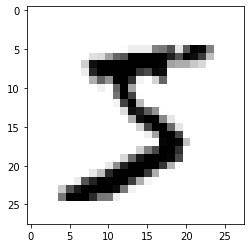

Label of image is 5


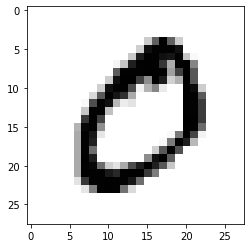

Label of image is 0


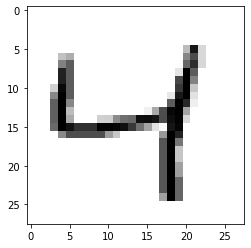

Label of image is 4


In [ ]:
import matplotlib.pyplot as plt

for i in range(0,3):
  pixels=x_train[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", y_train[i])

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(np.amax(x_train))
print(np.amin(x_train))

255
0


In [ ]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
x_train=x_train/255.0
x_test=x_test/255.0

**The network architecture**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 11, 11, 64)      

**"Fitting" the model**

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 25ms/step - loss: 0.4093 - accuracy: 0.8722 - val_loss: 2.1457 - val_accuracy: 0.3599
Epoch 2/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1374 - accuracy: 0.9582 - val_loss: 0.0750 - val_accuracy: 0.9771
Epoch 3/10
375/375 [==============================] - 10s 26ms/step - loss: 0.1038 - accuracy: 0.9688 - val_loss: 0.0555 - val_accuracy: 0.9821
Epoch 4/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0852 - accuracy: 0.9740 - val_loss: 0.0433 - val_accuracy: 0.9871
Epoch 5/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0750 - accuracy: 0.9769 - val_loss: 0.0428 - val_accuracy: 0.9874
Epoch 6/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.0465 - val_accuracy: 0.9865
Epoch 7/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.0393 - val_accuracy: 0.98

**Using the model to make predictions & evalution**

In [ ]:
y_pred = model.predict(x_test)

model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0405 - accuracy: 0.9886


[0.040450409054756165, 0.9886000156402588]

In [ ]:
epochs=10

In [ ]:
model.save_weights("model.h5")

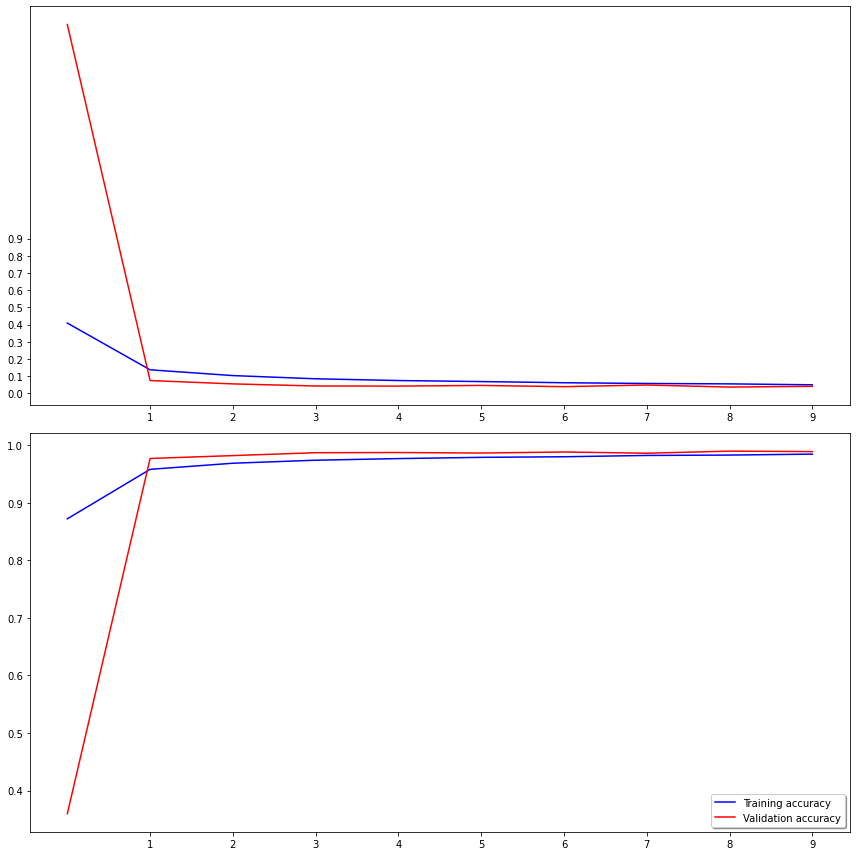

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()